Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

**Data Collection**

In [2]:
#loading the calorie data from csv file to Pandas Dataframe
calories = pd.read_csv('calories.csv')

In [3]:
#print the sample rows of the Dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#loading the calorie data from csv file to Pandas Dataframe
exercise = pd.read_csv('exercise.csv')

In [5]:
#print the sample of the Dataframe
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68.0,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20.0,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27.0,154.0,58.0,10.0,81.0,NaN


Combining two Dataframes

In [6]:
calories_data = pd.concat([exercise,calories['Calories']],axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68.0,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20.0,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69.0,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34.0,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27.0,154.0,58.0,10.0,81.0,NaN,35.0


In [8]:
#checking the number of rows and columns
calories_data.shape

(15000, 9)

In [9]:
calories_data.isnull().sum()

User_ID         0
Gender        158
Age           138
Height        149
Weight        148
Duration      158
Heart_Rate    141
Body_Temp     153
Calories        0
dtype: int64

**Data Preprocessing**

In [10]:
#Handle Numerical Columns using meadian
imputer_num = SimpleImputer(strategy='median')
numerical_columns = ['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']
calories_data[numerical_columns] = imputer_num.fit_transform(calories_data[numerical_columns])

In [11]:
calories_data.isnull().sum()

User_ID         0
Gender        158
Age             0
Height          0
Weight          0
Duration        0
Heart_Rate      0
Body_Temp       0
Calories        0
dtype: int64

In [12]:
#handle the categorical data
categorical_columns = ['Gender']
imputer_cat = SimpleImputer(strategy='most_frequent')
calories_data[categorical_columns] = imputer_cat.fit_transform(calories_data[categorical_columns])

In [13]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**EDA**

In [14]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.760800,174.458733,74.969133,15.541133,95.527800,40.026360,89.539533
std,2.872851e+06,16.914081,14.186317,14.958722,8.273327,9.548374,0.775689,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,86.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [15]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

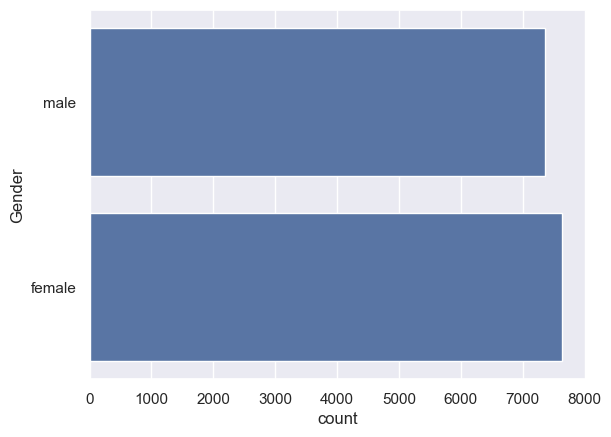

In [16]:
#Ploting the genter column in count plot
sns.countplot(calories_data['Gender'])

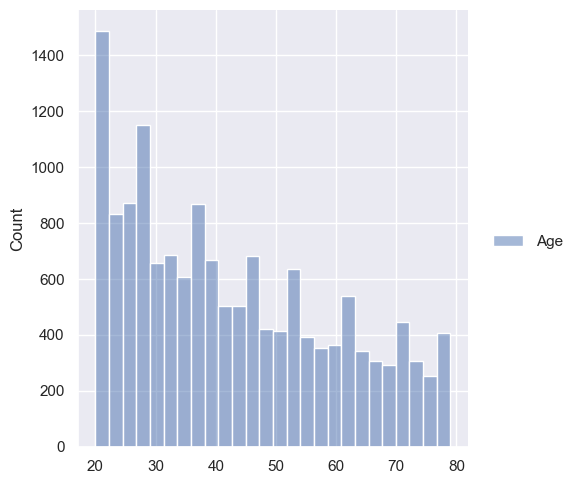

In [17]:
#finding the distribution of 'Age' column
sns.displot(calories_data[['Age']])

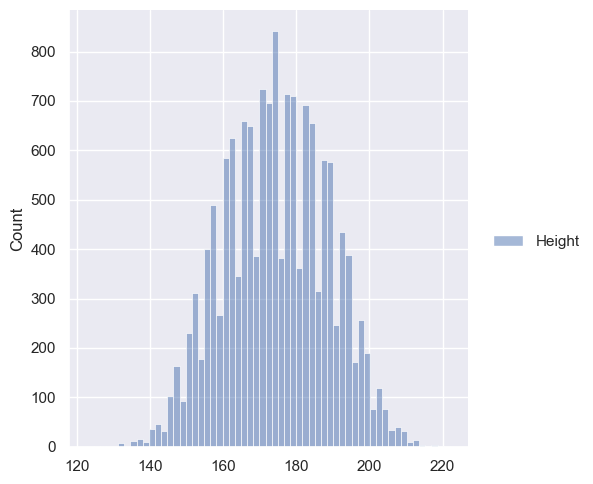

In [18]:
#finding the distribution of Height column
sns.displot(calories_data[['Height']])

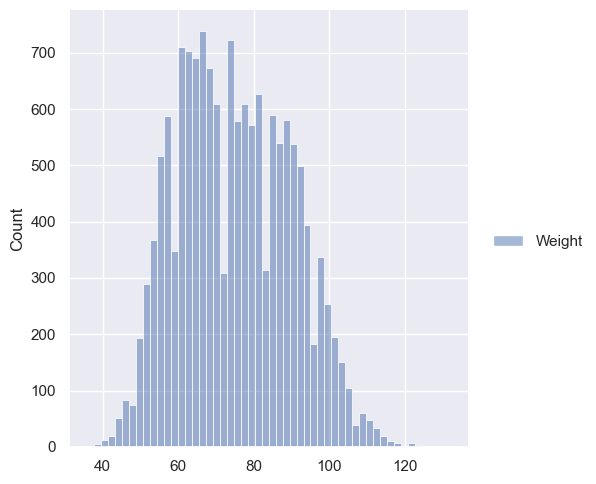

In [19]:
#finding the distribution of Weight column
sns.displot(calories_data[['Weight']])

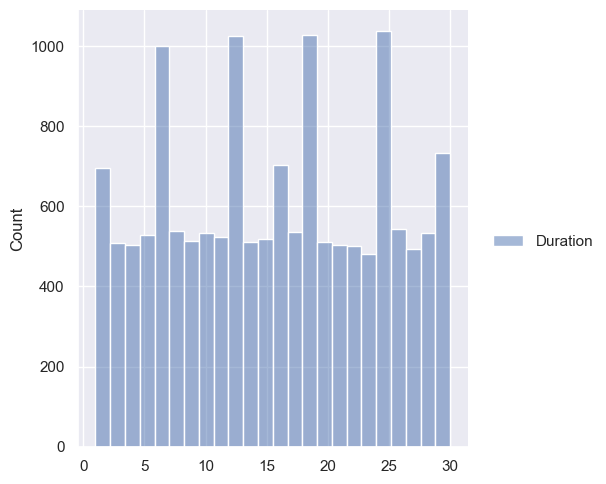

In [20]:
#finding the distribution of Duration column
sns.displot(calories_data[['Duration']])

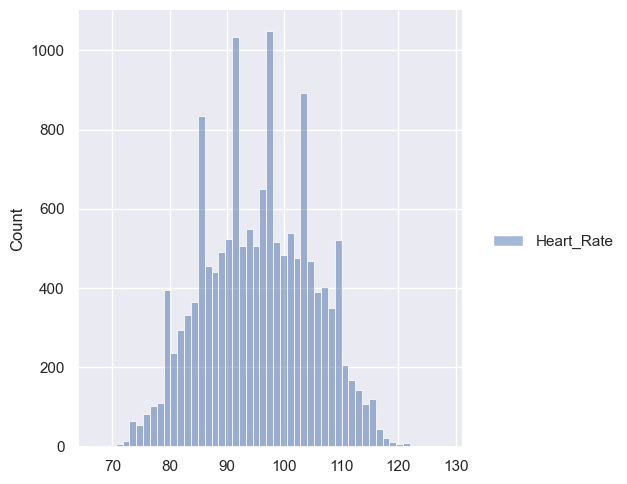

In [21]:
#finding the distribution of Heart Rate column
sns.displot(calories_data[['Heart_Rate']])

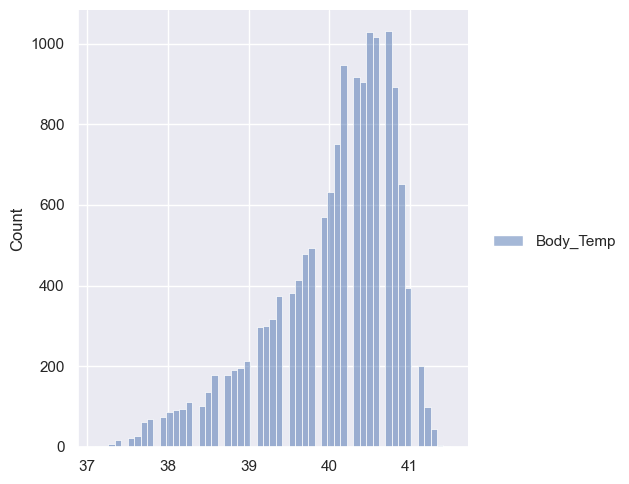

In [22]:
#finding the distribution of Body temp column
sns.displot(calories_data[['Body_Temp']])

Correlation in the dataset

In [23]:
#converting the text data to numerical values
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11056\1821573166.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [24]:
correlation = calories_data.corr()

<Axes: >

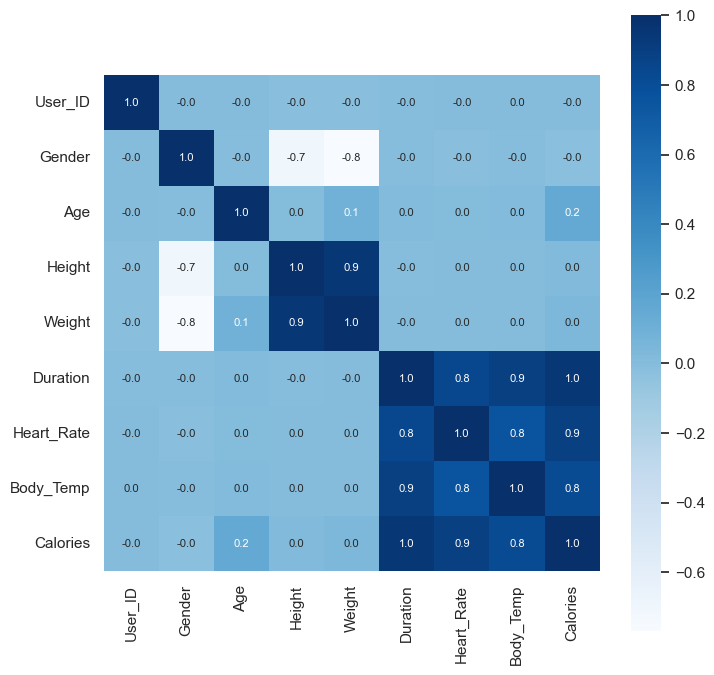

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Separating features and target

In [26]:
X= calories_data.drop(columns=['User_ID', 'Calories'],axis=1)
Y= calories_data['Calories']

In [27]:
print(X)

       Gender   Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0  68.0   190.0    94.0      29.0       105.0       40.8
1           1  20.0   166.0    60.0      14.0        94.0       40.3
2           0  69.0   179.0    79.0       5.0        88.0       38.7
3           1  34.0   179.0    71.0      13.0       100.0       40.5
4           1  27.0   154.0    58.0      10.0        81.0       40.2
...       ...   ...     ...     ...       ...         ...        ...
14995       1  20.0   193.0    86.0      11.0        92.0       40.4
14996       1  27.0   165.0    65.0       6.0        85.0       39.2
14997       1  43.0   159.0    58.0      16.0        90.0       40.1
14998       0  78.0   193.0    97.0       2.0        84.0       38.3
14999       0  63.0   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [28]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

Random Forest Regressor

In [31]:
# loading the model
model= RandomForestRegressor()

In [32]:
# training the model with X_train
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Evaluation**

Predicting on Test Data

In [33]:
test_data_prediction= model.predict(X_test)

In [34]:
print(test_data_prediction)

[128.62 221.87  34.11 ... 145.16  23.94  89.75]


MEAN Absolute Error

In [35]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [36]:
print("Mean Absolute Error=",mae)

Mean Absolute Error= 2.23165


In [37]:
# Calculate MAPE (Mean Absolute Percentage Error)
mape = (mae / Y_test.mean()) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 2.50%


In [38]:
# R² Score
r2 = r2_score(Y_test,test_data_prediction)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9944


***Save trained Random Forest model***

In [39]:
import pickle

with open("calories_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

metrics = {
    "mae": mae,
    "mape": mape,
    "r2": r2
}

with open("metrics.pkl", "wb") as metrics_file:
    pickle.dump(metrics, metrics_file)
print("✅ Model and metrics saved successfully!")


✅ Model and metrics saved successfully!
